Dataset :  https://www.kaggle.com/datamunge/sign-language-mnist/home

In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
local_zip_file="sign-language-mnist.zip"

zipfile=zipfile.ZipFile(local_zip_file,'r')
zipfile.extractall("")
zipfile.close()

In [3]:
import csv
def get_data(filename):
    with open(filename) as training_file:
        csv_reader = csv.reader(training_file, delimiter=',')
        first_line = True
        temp_images = []
        temp_labels = []
        for row in csv_reader:
            if first_line:
                # print("Ignoring first line")
                first_line = False
            else:
                temp_labels.append(row[0])
                image_data = row[1:785]
                image_data_as_array = np.array_split(image_data, 28)
                temp_images.append(image_data_as_array)
        images = np.array(temp_images).astype('float')
        labels = np.array(temp_labels).astype('float')
    return images, labels

In [4]:
train_data="sign_mnist_train.csv"
test_data="sign_mnist_test.csv"


training_images, training_labels = get_data(train_data)
testing_images, testing_labels = get_data(test_data)

print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


Label  6.0


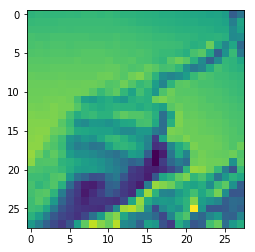

In [58]:
image_index=1
image=np.array(training_images[image_index,:])
image=image.reshape(28,28)
plt.imshow(image)
print("Label ",training_labels[image_index])

In [6]:
training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

In [7]:
print("Training Images",training_images.shape)
print("Testing Images",testing_images.shape)

Training Images (27455, 28, 28, 1)
Testing Images (7172, 28, 28, 1)


In [43]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                width_shift_range=0.2,
                                zoom_range=0.2,
                                height_shift_range=0.2,
                                horizontal_flip=True,
                                rotation_range=40,
                                fill_mode='nearest')


validation_datagen=ImageDataGenerator(rescale=1./255)

In [44]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(64,(2,2),input_shape=(28,28,1),activation='relu'),
                                 tf.keras.layers.MaxPooling2D(2,2),
                                  
                                 tf.keras.layers.Conv2D(128,(2,2),activation='relu'),
                                 tf.keras.layers.MaxPooling2D(2,2),
                                  
                                 tf.keras.layers.Conv2D(256,(2,2),activation='relu'),
                                 tf.keras.layers.MaxPooling2D(2,2),
                                  
                                 tf.keras.layers.Flatten(),
                                 tf.keras.layers.Dense(512,activation='relu'),
                                 tf.keras.layers.Dense(26,activation='softmax')
                                 ])

In [54]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='sparse_categorical_crossentropy',optimizer = tf.train.AdamOptimizer(),metrics=['accuracy'])

In [55]:
history=model.fit_generator(train_datagen.flow(training_images, training_labels, batch_size=32),
                              steps_per_epoch=len(training_images) / 32,
                              epochs=15,
                              validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=32),
                              validation_steps=len(testing_images) / 32)


Epoch 1/15
858/857 [==============================] - 45s 52ms/step - loss: 2.6540 - acc: 0.1817 - val_loss: 1.6059 - val_acc: 0.4579
Epoch 2/15
858/857 [==============================] - 45s 52ms/step - loss: 1.7318 - acc: 0.4346 - val_loss: 1.1348 - val_acc: 0.5917
Epoch 3/15
858/857 [==============================] - 39s 46ms/step - loss: 1.2892 - acc: 0.5741 - val_loss: 0.7813 - val_acc: 0.7296
Epoch 4/15
858/857 [==============================] - 39s 46ms/step - loss: 1.0268 - acc: 0.6557 - val_loss: 0.6024 - val_acc: 0.7800
Epoch 5/15
858/857 [==============================] - 41s 48ms/step - loss: 0.8522 - acc: 0.7098 - val_loss: 0.5657 - val_acc: 0.7875
Epoch 6/15
858/857 [==============================] - 41s 48ms/step - loss: 0.7250 - acc: 0.7543 - val_loss: 0.4946 - val_acc: 0.8210
Epoch 7/15
858/857 [==============================] - 41s 47ms/step - loss: 0.6336 - acc: 0.7844 - val_loss: 0.3644 - val_acc: 0.8576
Epoch 8/15
858/857 [==============================] - 42s 49ms

In [56]:
model.evaluate(testing_images,testing_labels)

7172/7172 [==============================] - 3s 384us/sample - loss: 73.5991 - acc: 0.8041


[73.59913136556172, 0.80409926]

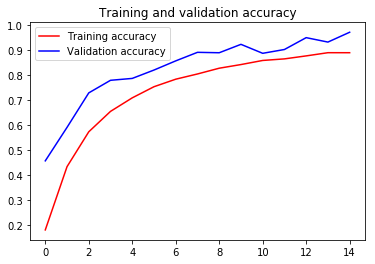

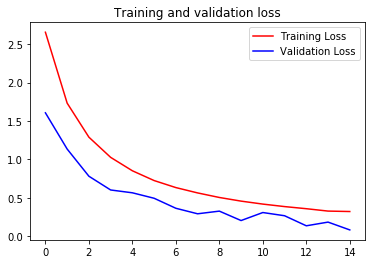

In [57]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()